# <font color='green'>**Atividade 10 - Maria Luísa**</h1>

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [38]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
# Separação de variáveis explicativas (X) e variável alvo (y)
X = data.iloc[:, :-1]  # Seleciona todas as colunas menos a última
y = data.iloc[:, -1]   # Seleciona a última coluna


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cria o modelo DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Avalia a acurácia do modelo DecisionTreeClassifier
dt_train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

print("Decision Tree - Acurácia de Treino:", dt_train_accuracy)
print("Decision Tree - Acurácia de Teste:", dt_test_accuracy)

# Cria o modelo RandomForestClassifier c
rf_model = RandomForestClassifier(max_depth=5)
rf_model.fit(X_train, y_train)

# Avalia a acurácia do modelo RandomForestClassifier
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print("Random Forest - Acurácia de Treino:", rf_train_accuracy)
print("Random Forest - Acurácia de Teste:", rf_test_accuracy)


Decision Tree - Acurácia de Treino: 0.746031746031746
Decision Tree - Acurácia de Teste: 0.6708860759493671
Random Forest - Acurácia de Treino: 0.8952380952380953
Random Forest - Acurácia de Teste: 0.7088607594936709


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [41]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão para DecisionTreeClassifier
dt_predictions = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Matriz de Confusão - Decision Tree:\n", dt_cm)

# Matriz de confusão para RandomForestClassifier
rf_predictions = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predictions)
print("\nMatriz de Confusão - Random Forest:\n", rf_cm)


Matriz de Confusão - Decision Tree:
 [[43 11]
 [15 10]]

Matriz de Confusão - Random Forest:
 [[47  7]
 [16  9]]


### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Métricas para DecisionTreeClassifier
dt_precision = precision_score(y_test, dt_predictions, average='weighted', zero_division=1)
dt_recall = recall_score(y_test, dt_predictions, average='weighted', zero_division=1)
dt_f1 = f1_score(y_test, dt_predictions, average='weighted', zero_division=1)

print("\nDecision Tree:")
print("Precisão:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)

# Métricas para RandomForestClassifier
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted', zero_division=1)

print("\nRandom Forest:")
print("Precisão:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)



Decision Tree:
Precisão: 0.6574587932073747
Recall: 0.6708860759493671
F1-Score: 0.6624538092617345

Random Forest:
Precisão: 0.6879520795660036
Recall: 0.7088607594936709
F1-Score: 0.6881041157052272


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

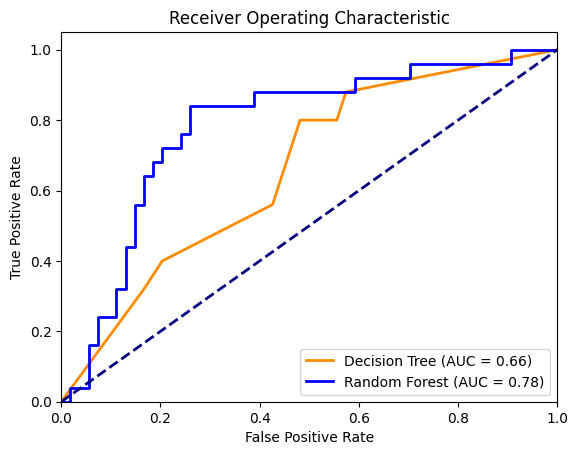

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

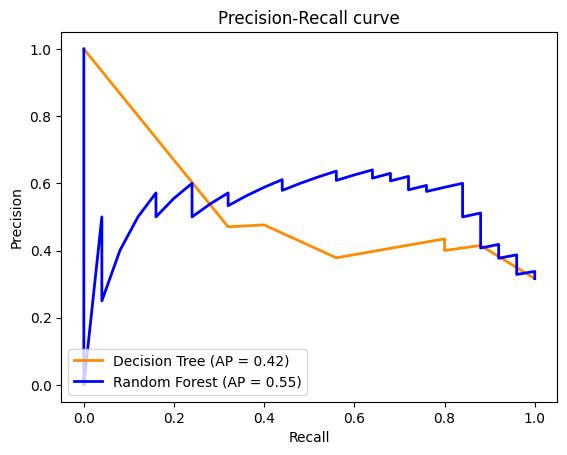

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_model.predict_proba(X_test)[:,1])
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:,1])
ap_dt = average_precision_score(y_test, dt_model.predict_proba(X_test)[:,1])
ap_rf = average_precision_score(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall_dt, precision_dt, color='darkorange', lw=2, label='Decision Tree (AP = %0.2f)' % ap_dt)
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Random Forest (AP = %0.2f)' % ap_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [45]:
from sklearn.metrics import classification_report

# Gerando os relatórios de classificação para cada modelo
report_dt = classification_report(y_test, dt_model.predict(X_test))
report_rf = classification_report(y_test, rf_model.predict(X_test))

# Exibindo os relatórios
print("Decision Tree Classification Report:\n", report_dt)
print("Random Forest Classification Report:\n", report_rf)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        54
           1       0.48      0.40      0.43        25

    accuracy                           0.67        79
   macro avg       0.61      0.60      0.60        79
weighted avg       0.66      0.67      0.66        79

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80        54
           1       0.56      0.36      0.44        25

    accuracy                           0.71        79
   macro avg       0.65      0.62      0.62        79
weighted avg       0.69      0.71      0.69        79



### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [46]:
import numpy as np

# Definindo a função para calcular o intervalo de confiança
def confidence_interval(scores, model_name):
    mean = np.mean(scores)
    margin_error = 2 * np.std(scores)
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error
    return f'Intervalo de confiança ("{model_name}"): [{lower_bound:.4f}, {upper_bound:.4f}]'

# Exemplo de uso com resultados simulados de validação cruzada
scores_example = [0.81, 0.82, 0.80, 0.79, 0.83, 0.85, 0.78, 0.84, 0.82, 0.80]

# Calculando o intervalo de confiança para o exemplo de scores de um modelo
interval_result = confidence_interval(scores_example, "Exemplo de Modelo")

# Imprimindo o resultado
print(interval_result)


Intervalo de confiança ("Exemplo de Modelo"): [0.7719, 0.8561]


### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [47]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores_dt = cross_val_score(dt_model, X, y, cv=kf)
scores_rf = cross_val_score(rf_model, X, y, cv=kf)

print(confidence_interval(scores_dt, "Decision Tree"))
print(confidence_interval(scores_rf, "Random Forest"))


Intervalo de confiança ("Decision Tree"): [0.5713, 0.7937]
Intervalo de confiança ("Random Forest"): [0.5630, 0.8326]


### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)

f1_scores_dt = cross_val_score(dt_model, X, y, cv=skf, scoring=f1_scorer)
f1_scores_rf = cross_val_score(rf_model, X, y, cv=skf, scoring=f1_scorer)

print(confidence_interval(f1_scores_dt, "Decision Tree"))
print(confidence_interval(f1_scores_rf, "Random Forest"))


Intervalo de confiança ("Decision Tree"): [0.2024, 0.7574]
Intervalo de confiança ("Random Forest"): [0.2388, 0.7002]


### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [49]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo_scores_dt = cross_val_score(dt_model, X, y, cv=loo)
loo_scores_rf = cross_val_score(rf_model, X, y, cv=loo)

mean_loo_dt = np.mean(loo_scores_dt)
mean_loo_rf = np.mean(loo_scores_rf)

print(f"Média do LeaveOneOut (Decision Tree): {mean_loo_dt:.4f}")
print(f"Média do LeaveOneOut (Random Forest): {mean_loo_rf:.4f}")


Média do LeaveOneOut (Decision Tree): 0.6701
Média do LeaveOneOut (Random Forest): 0.6777


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

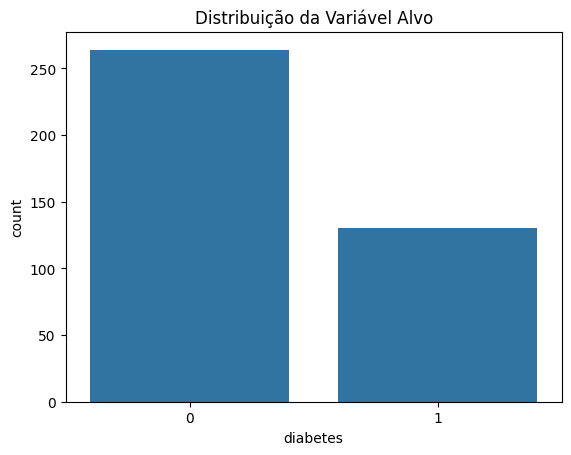

Proporção da variável alvo:
diabetes
0    67.005076
1    32.994924
Name: proportion, dtype: float64


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title('Distribuição da Variável Alvo')
plt.show()

# Verificando a proporção em porcentagem
proportion = y.value_counts(normalize=True) * 100
print(f"Proporção da variável alvo:\n{proportion}")


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.